In [1]:
from main import *
from visualization import *
from stats import *

from scipy.stats import pearsonr, spearmanr, zscore

%matplotlib inline
plt.rcParams['font.size'] = 18

# Setting paths & loading data

In [2]:
top_directory = '/media/anleg84/KINGSTON/Datasets/Networks2024/'
datasets = get_datasets(top_directory, keywords=['920nm'], exclude=[])

atlas_path = '/home/anleg84/Documents/Atlas/MapzebrainOld/'
atlas = MapzebrainAtlas(atlas_path)

In [3]:
excluded = np.load('Results/excluded_regions.npy')

# Supp. Figure: Comparing FC to regional intensity levels

In [6]:
FC_matrices = np.load('Results/FC_matrices.npy')

In [11]:
regional_intensities_raw, regional_intensities_dff = [], []

for folder in tqdm(datasets):

    data = load_data(folder)
    
    # Raw intensities
    dff = data['timeseries']
    region_series = np.zeros((70, dff.shape[1]))
    for i in range(70):
        labels = data['region_labels'][:, i]
        if np.any(labels):
            region_series[i] = np.mean(dff[labels != 0], axis=0)
    #region_series = np.stack(region_series, axis=0)
    avg_intensity = np.mean(region_series, axis=1)
    regional_intensities_raw.append(avg_intensity)

    # Detrended intensities
    dff = np.load(folder + 'dff.npy')
    region_series = np.zeros((70, dff.shape[1]))
    for i in range(70):
        labels = data['region_labels'][:, i]
        if np.any(labels):
            region_series[i] = np.mean(dff[labels != 0], axis=0)
    #region_series = np.stack(region_series, axis=0)
    avg_intensity = np.mean(region_series, axis=1)
    regional_intensities_dff.append(avg_intensity)

regional_intensities_raw = np.delete(np.stack(regional_intensities_raw, axis=0), excluded, axis=1)
regional_intensities_dff = np.delete(np.stack(regional_intensities_dff, axis=0), excluded, axis=1)

100%|███████████████████████████████████████████| 22/22 [00:32<00:00,  1.48s/it]


In [12]:
intensity_matrices_raw = []
for i in regional_intensities_raw:
    intensity_matrices_raw.append(i[:, None] @ i[None, :])
    
intensity_matrices_dff = []
for i in regional_intensities_dff:
    intensity_matrices_dff.append(i[:, None] @ i[None, :])

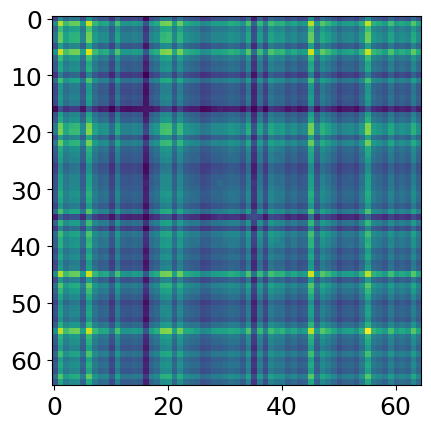

In [39]:
plt.imshow(np.nanmean(intensity_matrices_dff, axis=0))

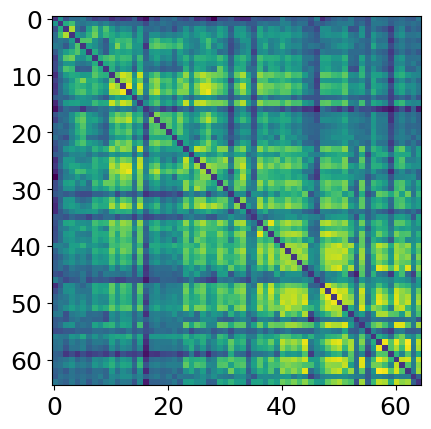

In [14]:
plt.imshow(np.nanmean(FC_matrices, axis=0))

# Rendering figure

114738470.53146358
6290490.373980272
(0.18582833114565767, 1.2908687741290811e-17)
0.5938839508452488
0.2317607001549398
(-0.13086495206927407, 2.091316939887718e-09)


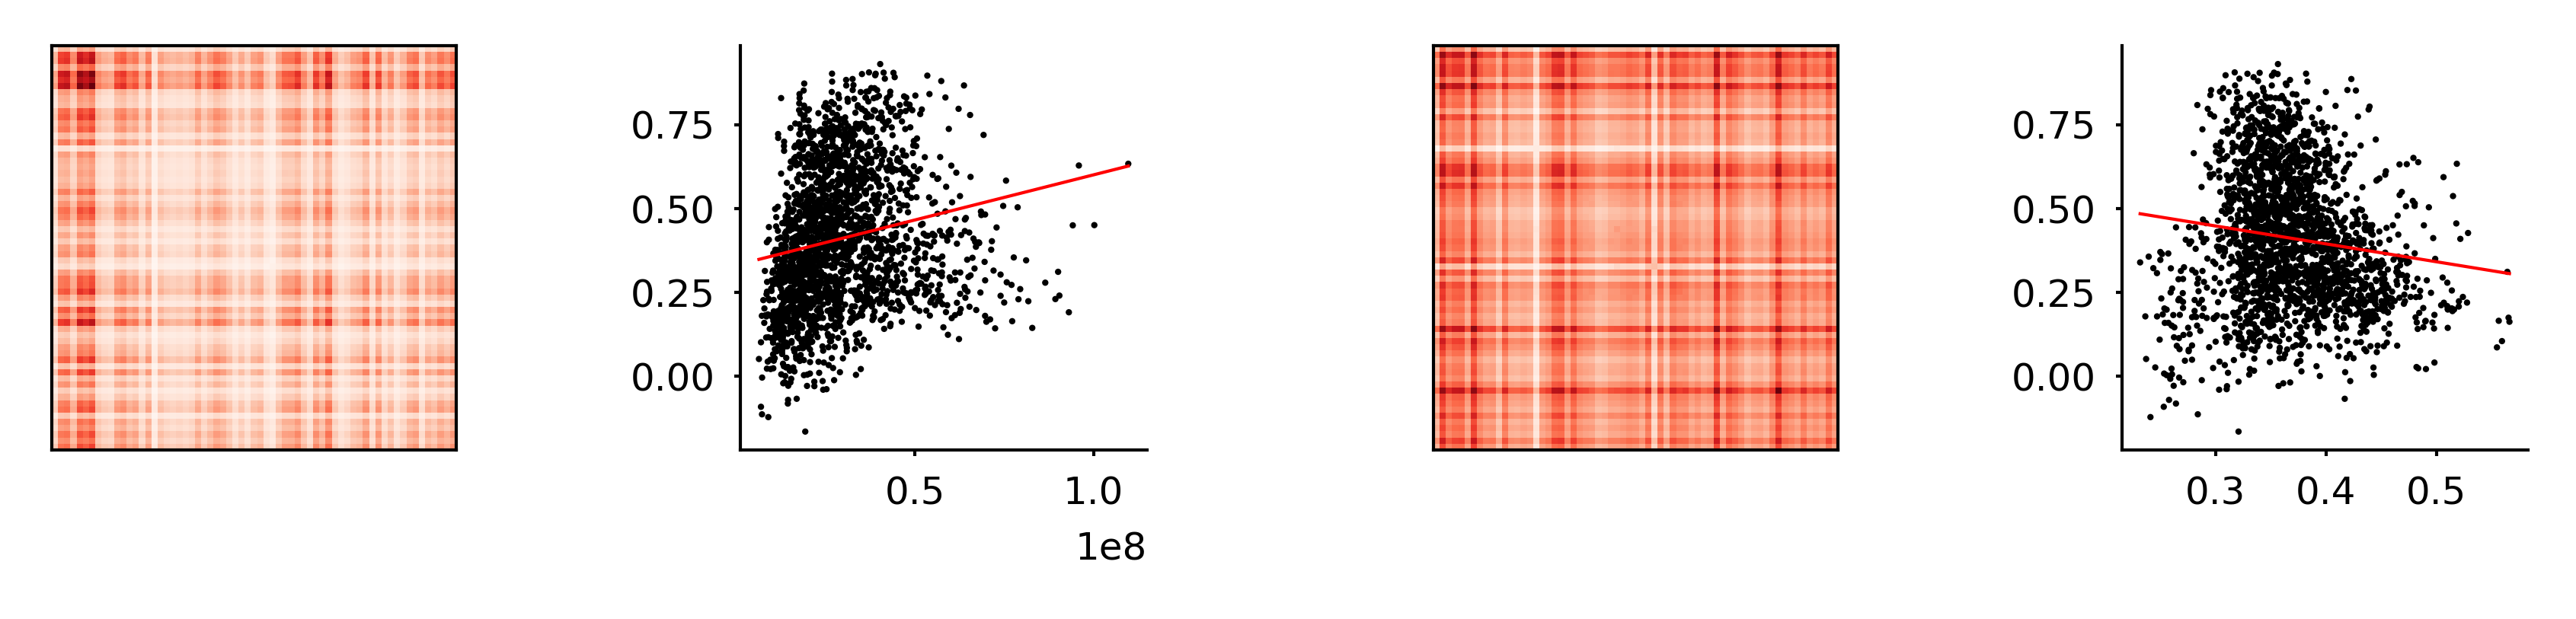

In [70]:
fig = PaperFigure(figsize=(7, 1.5), dpi=600)

fig.set_tick_length(1)
fig.set_font_size(6)
fig.add_background()

# Adding panels -------------------------------

w = 1.15
pad = (7 - 4 * w ) / 3
fig.add_axes('matrix1', (0 * (w + pad), 0), w, w)
fig.add_axes('scatter1', (1 * (w + pad), 0), w, w)
fig.add_axes('matrix2', (2 * (w + pad), 0), w, w)
fig.add_axes('scatter2', (3 * (w + pad), 0), w, w)

fig.set_line_thickness(0.5)

# Content -------------------------------------

ax = fig.axes['matrix1']
ax.imshow(np.nanmean(intensity_matrices_raw, axis=0), cmap='Reds')
print(np.max(np.nanmean(intensity_matrices_raw, axis=0)))
print(np.min(np.nanmean(intensity_matrices_raw, axis=0)))
ax.set_xticks([])
ax.set_yticks([])

ax = fig.axes['scatter1']
triangle = np.triu_indices(np.nanmean(FC_matrices, axis=0).shape[0], 1)
x = np.nanmean(intensity_matrices_raw, axis=0)[triangle]
y = np.nanmean(FC_matrices, axis=0)[triangle]
a, b = np.polyfit(x, y, deg=1)
ax.scatter(x, y, color='black', s=1, edgecolor='None')
x_ = np.linspace(np.min(x), np.max(x))
ax.plot(x_, a * x_ + b, color='red', linewidth=0.5)
ax.spines[['top', 'right']].set_visible(False)
print(pearsonr(x, y))

ax = fig.axes['matrix2']
ax.imshow(np.nanmean(intensity_matrices_dff, axis=0), cmap='Reds')
print(np.max(np.nanmean(intensity_matrices_dff, axis=0)))
print(np.min(np.nanmean(intensity_matrices_dff, axis=0)))
ax.set_xticks([])
ax.set_yticks([])

ax = fig.axes['scatter2']
triangle = np.triu_indices(np.nanmean(FC_matrices, axis=0).shape[0], 1)
x = np.nanmean(intensity_matrices_dff, axis=0)[triangle]
y = np.nanmean(FC_matrices, axis=0)[triangle]
a, b = np.polyfit(x, y, deg=1)
ax.scatter(x, y, color='black', s=1, edgecolor='None')
x_ = np.linspace(np.min(x), np.max(x))
ax.plot(x_, a * x_ + b, color='red', linewidth=0.5)
ax.spines[['top', 'right']].set_visible(False)
print(pearsonr(x, y))

# Displaying ----------------------------------

fig.save('/home/anleg84/Documents/Figures/PaperNetworks2024/supp_FC_intensities.svg')

fig.show()